

# Import required packages

In [122]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import numpy as np

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import graphviz
import pydotplus
import pandas as pd
from sklearn import tree
from io import StringIO
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


# drop columns

In [123]:
data = pd.read_excel("USMassShootings.xlsx")

In [124]:
data.drop('SUMMARY', inplace=True, axis=1)

In [125]:
data.drop('CASE', inplace=True, axis=1)

In [126]:
data.drop('LOCATION', inplace=True, axis=1)

In [127]:
data.drop('SOURCES', inplace=True, axis=1)

In [128]:
data.drop('WEAPONDETAILS', inplace=True, axis=1)

In [129]:
data.drop('TYPEOFWEAPONS', inplace=True, axis=1)

In [130]:
data.drop('MENTALHEALTHSOURCES', inplace=True, axis=1)

In [131]:
data.drop('MENTALHEALTHNOTES', inplace=True, axis=1)

In [132]:
data.drop('WHEREWEAPONOBTAINED', inplace=True, axis=1)


In [133]:
data.drop('DATE', inplace=True, axis=1)


In [134]:
data.drop('STATE', inplace=True, axis=1)


In [135]:
data.isnull().sum()

GENDER                       0
SHOOTINGTYPE                 0
RACE                         0
YEAR                         0
FATALITIES                   0
WOUNDED                      0
TOTALVICTIMS                 0
LOCATIONTYPE                 0
PRIORSIGNSOFMENTALILLNESS    0
WEAPONSOBTAINEDLEGALLY       2
NUMWEAPONS                   0
ASSAULT                      0
LATITUDE                     0
LONGITUDE                    0
dtype: int64

In [136]:
a = data.fillna("No")

In [137]:
a.isnull().sum()

GENDER                       0
SHOOTINGTYPE                 0
RACE                         0
YEAR                         0
FATALITIES                   0
WOUNDED                      0
TOTALVICTIMS                 0
LOCATIONTYPE                 0
PRIORSIGNSOFMENTALILLNESS    0
WEAPONSOBTAINEDLEGALLY       0
NUMWEAPONS                   0
ASSAULT                      0
LATITUDE                     0
LONGITUDE                    0
dtype: int64

In [138]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     71 non-null     object 
 1   SHOOTINGTYPE               71 non-null     object 
 2   RACE                       71 non-null     object 
 3   YEAR                       71 non-null     int64  
 4   FATALITIES                 71 non-null     int64  
 5   WOUNDED                    71 non-null     int64  
 6   TOTALVICTIMS               71 non-null     int64  
 7   LOCATIONTYPE               71 non-null     object 
 8   PRIORSIGNSOFMENTALILLNESS  71 non-null     object 
 9   WEAPONSOBTAINEDLEGALLY     71 non-null     object 
 10  NUMWEAPONS                 71 non-null     int64  
 11  ASSAULT                    71 non-null     object 
 12  LATITUDE                   71 non-null     float64
 13  LONGITUDE                  71 non-null     float64
d

In [139]:
numeric_cols = ['YEAR', 'FATALITIES', 'WOUNDED', 'TOTALVICTIMS', 'NUMWEAPONS', 'LATITUDE', 'LONGITUDE']

In [140]:
categorical_cols = ['GENDER', 'SHOOTINGTYPE', 'RACE', 'LOCATIONTYPE', 'WEAPONSOBTAINEDLEGALLY', 'ASSAULT'] 



In [141]:
a.GENDER.unique()

array(['Male', 'Female'], dtype=object)

In [142]:
a.SHOOTINGTYPE.unique()

array(['Mass', 'Spree'], dtype=object)

In [143]:
a.RACE.unique()

array(['Middle Eastern', 'White', 'Native American', 'Black', 'Latino',
       'Asian', 'Other'], dtype=object)

In [144]:
a.LOCATIONTYPE.unique()

array(['Military', 'Religious', 'School', 'Other', 'Workplace'],
      dtype=object)

In [145]:
a.PRIORSIGNSOFMENTALILLNESS.unique()

array(['Yes', 'No'], dtype=object)

In [146]:
a.WEAPONSOBTAINEDLEGALLY.unique()

array(['Yes', 'No'], dtype=object)

In [147]:
a.ASSAULT.unique()

array(['Yes', 'No'], dtype=object)

In [148]:
data = pd.get_dummies(a, columns = categorical_cols, drop_first=True)

In [149]:
data.head(10)

,YEAR,FATALITIES,WOUNDED,TOTALVICTIMS,PRIORSIGNSOFMENTALILLNESS,NUMWEAPONS,LATITUDE,LONGITUDE,GENDER_Male,SHOOTINGTYPE_Spree,...,RACE_Middle Eastern,RACE_Native American,RACE_Other,RACE_White,LOCATIONTYPE_Other,LOCATIONTYPE_Religious,LOCATIONTYPE_School,LOCATIONTYPE_Workplace,WEAPONSOBTAINEDLEGALLY_Yes,ASSAULT_Yes
0,2015,5,2,7,Yes,3,35.047157,-85.311821,1,0,...,1,0,0,0,0,0,0,0,1,1
1,2015,9,1,10,No,1,32.788387,-79.933144,1,0,...,0,0,0,1,0,1,0,0,1,0
2,2014,5,1,6,No,1,48.050823,-122.176918,1,0,...,0,1,0,0,0,0,1,0,0,0
3,2014,4,2,6,No,2,41.487103,-120.542236,0,0,...,0,1,0,0,1,0,0,0,0,0
4,2013,12,8,20,Yes,1,38.874981,-76.994530,1,0,...,0,0,0,0,0,0,0,0,1,0
5,2013,7,0,7,Yes,1,25.867010,-80.291466,1,0,...,0,0,0,0,1,0,0,0,1,0
6,2013,6,3,9,Yes,2,34.008617,-118.494751,1,1,...,0,0,0,1,1,0,0,0,1,1
7,2013,5,0,5,No,2,47.312962,-122.339363,1,0,...,0,0,0,0,1,0,0,0,1,0
8,2013,5,2,7,No,1,43.045601,-74.984894,1,1,...,0,0,0,1,1,0,0,0,1,0
9,2012,28,2,30,Yes,4,41.412323,-73.311424,1,0,...,0,0,0,1,0,0,1,0,0,1


In [150]:
y = data['PRIORSIGNSOFMENTALILLNESS']

In [151]:
X = data.drop(columns=['PRIORSIGNSOFMENTALILLNESS'])

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [153]:
# feature scaling

In [154]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [155]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [156]:
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)

SVC(C=10.0, kernel='linear', random_state=1)

In [157]:
svc1 = SVC(kernel='linear', C=10.0, random_state=1)
svc1.fit(X_train_std, y_train)

SVC(C=10.0, kernel='linear', random_state=1)

In [158]:
svc2 = SVC(kernel='linear', C=10.0, random_state=1)
svc2.fit(X_train_norm, y_train)

SVC(C=10.0, kernel='linear', random_state=1)

In [159]:
y_pred = svc.predict(X_test)

In [160]:
y_pred_std = svc1.predict(X_test_std)

In [161]:
y_pred_norm = svc2.predict(X_test_norm)

In [162]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [163]:
conf_matrix_std = confusion_matrix(y_true=y_test, y_pred=y_pred_std)

In [164]:
conf_matrix_norm = confusion_matrix(y_true=y_test, y_pred=y_pred_norm)

In [165]:
print(conf_matrix)

[[2 7]
 [2 7]]


In [166]:
print(conf_matrix_std)

[[5 4]
 [2 7]]


In [167]:
print(conf_matrix_norm)

[[2 7]
 [1 8]]


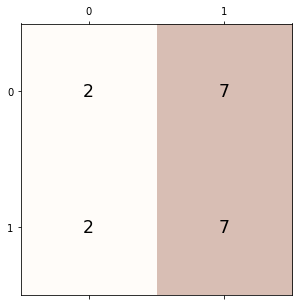

In [168]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

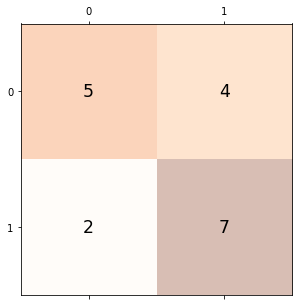

In [169]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_std, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_std.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_std[i, j], va='center', ha='center', size='xx-large')

In [170]:
precision = 2/(2+7)
print(f"The precision score is: {precision}.")
recall = 2/(2+2)
print(f"The recall score is: {recall}.")
accuracy = (2+7)/(2+2+7+7)
print(f"The accuracy score is: {accuracy}.")
f1 = (2*precision*recall)/(precision+recall)
f1 = round(f1,3)
print(f"The f1 score is: {f1}.")

The precision score is: 0.2222222222222222.
The recall score is: 0.5.
The accuracy score is: 0.5.
The f1 score is: 0.308.


In [171]:
precision_std = 2/(2+7)
print(f"The precision score is: {precision_std}.")
recall_std = 2/(2+2)
print(f"The recall score is: {recall_std}.")
accuracy_std = (2+7)/(2+2+7+7)
print(f"The accuracy score is: {accuracy_std}.")
f1_std = (2*precision*recall)/(precision_std+recall_std)
f1_std = round(f1_std,3)
print(f"The f1 score is: {f1_std}.")

The precision score is: 0.2222222222222222.
The recall score is: 0.5.
The accuracy score is: 0.5.
The f1 score is: 0.308.


In [172]:
precision_norm = 2/(2+7)
print(f"The precision score is: {precision_norm}.")
recall_norm = 2/(2+2)
print(f"The recall score is: {recall_norm}.")
accuracy_norm = (2+7)/(2+2+7+7)
print(f"The accuracy score is: {accuracy_norm}.")
f1_norm = (2*precision*recall)/(precision_norm+recall_norm)
f1_norm = round(f1_norm,3)
print(f"The f1 score is: {f1_norm}.")

The precision score is: 0.2222222222222222.
The recall score is: 0.5.
The accuracy score is: 0.5.
The f1 score is: 0.308.


In [173]:
log_regression=LogisticRegression(C=7)

In [174]:
log_regression.fit(X_train,y_train)

/Users/JohnSchueler/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=7)

In [175]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]

In [176]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc = round(auc, 3)

In [177]:
print(f"The Area Under the Curve is: {auc}.")

The Area Under the Curve is: 0.593.


In [178]:
# standardized data

In [179]:
log_regression.fit(X_train_std,y_train)

LogisticRegression(C=7)

In [180]:
y_pred_proba = log_regression.predict_proba(X_test_std)[::,1]

In [181]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc = round(auc, 3)

In [182]:
print(f"The Area Under the Curve is: {auc}.")

The Area Under the Curve is: 0.494.


In [183]:
# normalized data

In [184]:
log_regression.fit(X_train_norm,y_train)

LogisticRegression(C=7)

In [185]:
y_pred_proba = log_regression.predict_proba(X_test_norm)[::,1]

In [186]:
print(f"The Area Under the Curve is: {auc}.")

The Area Under the Curve is: 0.494.
